In [2]:
id="SRR639771" # Sequence Read Archive ID (NCBI)
GENOME_DIR="/content/genome/"
FASTQ_DIR="/content/fastq/"
GTF_URL="ftp://ftp.ensemblgenomes.org/pub/release-39/fungi/gtf/fungi_basidiomycota1_collection/cryptococcus_neoformans_var_grubii_h99/Cryptococcus_neoformans_var_grubii_h99.CNA3.39.gtf.gz"
FASTA_URL="ftp://ftp.ensemblgenomes.org/pub/release-39/fungi/fasta/fungi_basidiomycota1_collection/cryptococcus_neoformans_var_grubii_h99/dna/Cryptococcus_neoformans_var_grubii_h99.CNA3.dna.toplevel.fa.gz"
FASTAGZ=GENOME_DIR+FASTA_URL.split("/")[-1]
GTFGZ=GENOME_DIR+GTF_URL.split("/")[-1]
FASTA=FASTAGZ.replace(".gz","")
GTF=GTFGZ.replace(".gz","")
STAR_PATH="/content/STAR/source/STAR" #where to install Spliced Transcripts Alignment to a Reference
STAR_OUT="/content/starout/"

In [3]:
!apt install sra-toolkit &>/dev/null

In [4]:
%%bash -s "$id" "$FASTQ_DIR"
prefetch ${1} &>/dev/null
fastq-dump --outdir ${2} --gzip --skip-technical  --readids --read-filter pass --dumpbase --split-3 --clip /content/${1}/${1}.sra &>/dev/null

In [5]:
%%bash -s "$id"
zcat /content/fastq/${1}_pass_1.fastq.gz | head

@SRR639771.1.1 1 length=101
GTCAGGCTGCGGTGACCGCCGAACATCAGCGGTTTTCTCCCATCGCGCATGGGTTTTTCTCAAGCTATGCATCCATGCATCGCACCCTTCGATAGAGCGAA
+SRR639771.1.1 1 length=101
C@CFFFFFGDHHFGGEIGHEGDGIIJJCIJJIHIJJJIJJEEAEFBDDBDDDDCDB?BCDDECCC3@ADCADCCCDD?CA>@DDBDBD?CBBC@DCCDBB9
@SRR639771.2.1 2 length=101
AGAGCGAACCAAGACGGATCGATCGGTGGAATAAAATTCCCATAGGGCACAGGTTTGGGGTGTGGAGACCGGTTGGAAAAAAACGGGGTTTTCGCGCCCAT
+SRR639771.2.1 2 length=101
??@?=?<D:8<AF:<@::?:8DDE@@8B6BFECFFEAB==38777@(3@EFF<7;7;(99'',,5(5:<259>;<9A3:@<9@9@?99<50<A########
@SRR639771.3.1 3 length=101
CGAATGTTGCCTGTTGCAATAACAGAGTCGGGAGTAATGCCAGGATGTTGCTTCTTGATGTGTGTGACAAGCCTCCTTCTTGTCACTGACTGAATACCCTT


In [6]:
!pip install pysam &>/dev/null

In [7]:
%%bash
git clone https://github.com/alexdobin/STAR.git && make -C STAR/source &>/dev/null

Cloning into 'STAR'...


In [8]:
%%bash -s "$GENOME_DIR" "$STAR_OUT" "$GTF_URL" "$FASTA_URL" "$GTFGZ" "$FASTAGZ" "$GTF" "$FASTA" "$STAR_PATH"

mkdir -p "${1}"
mkdir -p "${2}"

if wget --quiet --directory-prefix="${1}" "${3}"; then
    echo "First file downloaded successfully."
else
    echo "Error downloading the first file. Exiting."
    exit 1
fi

if wget --quiet --directory-prefix="${1}" "${4}"; then
    echo "Second file downloaded successfully."
else
    echo "Error downloading the second file. Exiting."
    exit 1
fi

gunzip "${5}"
gunzip "${6}"

${9} --runMode genomeGenerate --genomeDir "${1}" --genomeFastaFiles "${8}" --sjdbGTFfile "${7}" --outFileNamePrefix "${2}/genome_" --genomeSAindexNbases 11 --outSAMtype BAM SortedByCoordinat


First file downloaded successfully.
Second file downloaded successfully.
	/content/STAR/source/STAR --runMode genomeGenerate --genomeDir /content/genome/ --genomeFastaFiles /content/genome/Cryptococcus_neoformans_var_grubii_h99.CNA3.dna.toplevel.fa --sjdbGTFfile /content/genome/Cryptococcus_neoformans_var_grubii_h99.CNA3.39.gtf --outFileNamePrefix /content/starout//genome_ --genomeSAindexNbases 11 --outSAMtype BAM SortedByCoordinat
	STAR version: 2.7.11a   compiled: 2023-12-21T07:16:12+00:00 4b5a80ed4963:/content/STAR/source
Dec 21 07:20:41 ..... started STAR run
Dec 21 07:20:41 ... starting to generate Genome files
Dec 21 07:20:42 ..... processing annotations GTF
Dec 21 07:20:43 ... starting to sort Suffix Array. This may take a long time...
Dec 21 07:20:44 ... sorting Suffix Array chunks and saving them to disk...
Dec 21 07:21:09 ... loading chunks from disk, packing SA...
Dec 21 07:21:10 ... finished generating suffix array
Dec 21 07:21:10 ... generating Suffix Array index
Dec 21 07

In [9]:
%%bash -s "$GENOME_DIR" "$id" "$FASTQ_DIR" "$STAR_PATH" "$STAR_OUT"

${4} \
--genomeDir "${1}" \
--readFilesIn "${3}${2}_pass_1.fastq.gz" \
--readFilesCommand zcat \
--outBAMsortingBinsN 200 \
--runThreadN 2 \
--limitBAMsortRAM 1795207491 \
--outSAMtype BAM SortedByCoordinate \
--outFileNamePrefix ${5} \


	/content/STAR/source/STAR --genomeDir /content/genome/ --readFilesIn /content/fastq/SRR639771_pass_1.fastq.gz --readFilesCommand zcat --outBAMsortingBinsN 200 --runThreadN 2 --limitBAMsortRAM 1795207491 --outSAMtype BAM SortedByCoordinate --outFileNamePrefix /content/starout/
	STAR version: 2.7.11a   compiled: 2023-12-21T07:16:12+00:00 4b5a80ed4963:/content/STAR/source
Dec 21 07:22:28 ..... started STAR run
Dec 21 07:22:29 ..... loading genome
Dec 21 07:22:29 ..... started mapping
Dec 21 07:25:58 ..... finished mapping
Dec 21 07:25:58 ..... started sorting BAM
Dec 21 07:26:19 ..... finished successfully


In [10]:
import pysam
pysam.index(STAR_OUT+"Aligned.sortedByCoord.out.bam")

''

In [11]:
bam_file = STAR_OUT+ "Aligned.sortedByCoord.out.bam"
bai_file = STAR_OUT+ "Aligned.sortedByCoord.out.bam.bai"
gtf_file = GTF
# Create a pysam AlignmentFile object with the index file
samfile1 = pysam.AlignmentFile(bam_file, "rb", index_filename=bai_file)
gene_read_counts = []

with open(gtf_file, "r") as gtf:
    for line in gtf:
        if line.startswith("#"):
            continue  # Skip comments in GTF file

        #if 'exon_number "1"' in line and line[0:2]=="Mt":
        fields = line.strip().split("\t")
        feature = fields[2]
        if feature == 'exon':
            chromosome = fields[0]#.replace("chr","")

            start = int(fields[3])
            end = int(fields[4])
            gene_name_full = fields[8]

            nameparts=gene_name_full.split(";")
            gene_id=nameparts[0].split(" ")[1].replace("\"","")

            transcript_id=nameparts[1].split(" ")[2].replace("\"","")
            exon_number=nameparts[2].split(" ")[2].replace("\"","")

            #print(chromosome,feature,start,end,gene_name_full)
            # Count reads that fall between start and end coordinates of the exon
            try:
              read_count = samfile1.count(chromosome, start, end)
              gene_read_counts.append((feature,chromosome, gene_id,transcript_id,exon_number,end-start+1,read_count))
            except:
              w=1


In [12]:
samfile1.references

('1',
 'Mt',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14')

In [13]:
len(gene_read_counts)

52036

In [14]:
gene_read_counts[0:100]

[('exon', '1', 'CNAG_04548', 'AFR92135', '1', 152, 4),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '2', 101, 4),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '3', 1306, 5),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '4', 685, 4),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '5', 281, 3),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '6', 461, 3),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '7', 452, 3),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '8', 212, 3),
 ('exon', '1', 'CNAG_04548', 'AFR92135', '9', 1398, 3),
 ('exon', '1', 'CNAG_07303', 'AGV15254', '1', 298, 7),
 ('exon', '1', 'CNAG_07303', 'AGV15254', '2', 1699, 20),
 ('exon', '1', 'CNAG_07303', 'AFR92136', '1', 85, 7),
 ('exon', '1', 'CNAG_07303', 'AFR92136', '2', 1418, 16),
 ('exon', '1', 'CNAG_07304', 'AFR92137', '1', 293, 150),
 ('exon', '1', 'CNAG_07304', 'AFR92137', '2', 481, 147),
 ('exon', '1', 'CNAG_00001', 'AFR92138', '1', 242, 27),
 ('exon', '1', 'CNAG_00001', 'AFR92138', '2', 473, 46),
 ('exon', '1', 'CNAG_07305', 'AFR92139', '1', 465, 39)

In [15]:
import pandas as pd
df=pd.DataFrame(gene_read_counts,columns=['Feature','Chromosome','Gene ID','Transcript ID', 'Exon','Length','Counts'])
df.head()

,Feature,Chromosome,Gene ID,Transcript ID,Exon,Length,Counts
0,exon,1,CNAG_04548,AFR92135,1,152,4
1,exon,1,CNAG_04548,AFR92135,2,101,4
2,exon,1,CNAG_04548,AFR92135,3,1306,5
3,exon,1,CNAG_04548,AFR92135,4,685,4
4,exon,1,CNAG_04548,AFR92135,5,281,3


In [16]:
#Reads Per Kilobase of exon per Million mapped reads
total_mapped_reads = samfile1.mapped
df['RPKM'] = (df.Counts / df.Length) * (1e6 / total_mapped_reads)

In [17]:
df.shape

(52036, 8)

In [18]:
P=pd.pivot_table(data=df,values="RPKM",index=['Chromosome','Feature','Gene ID','Transcript ID'],aggfunc='mean')
P.sort_values(by='RPKM',ascending=False).head(20)

,,,,RPKM
Chromosome,Feature,Gene ID,Transcript ID,
1,exon,CNAG_00588,AFR92718,22.436567
3,exon,CNAG_03007,AFR93685,18.077456
8,exon,CNAG_03143,AFR96369,11.395807
3,exon,CNAG_02959,AFR93733,11.360109
12,exon,CNAG_06207,AFR98434,11.253400
11,exon,CNAG_01621,AFR97826,9.617275
14,exon,CNAG_05424,AFR98852,9.046546
8,exon,CNAG_03482,AGV14565,8.730554
2,exon,CNAG_12145,CNAG_12145-1,7.966631


In [19]:
df.groupby(by = 'Gene ID').mean(numeric_only = True).sort_values(by='RPKM',ascending=False).head(20)

,Length,Counts,RPKM
Gene ID,,,
CNAG_00588,300.000000,8088.200000,22.436567
CNAG_03007,141.000000,6459.166667,18.077456
CNAG_03143,432.666667,8456.333333,11.395807
CNAG_02959,252.000000,1328.000000,11.360109
CNAG_06207,185.666667,8141.000000,11.253400
CNAG_01621,339.000000,6139.200000,9.617275
CNAG_05424,200.333333,3817.166667,9.046546
CNAG_12145,82.000000,2828.000000,7.966631
CNAG_03482,124.230769,1447.615385,7.950336


In [20]:
data=df.groupby(by = 'Chromosome').mean(numeric_only = True).sort_values(by='RPKM',ascending=False).reset_index()
data

,Chromosome,Length,Counts,RPKM
0,12,317.064487,325.466394,0.574215
1,8,352.693365,306.055776,0.570439
2,3,339.670181,294.537474,0.546057
3,11,326.169630,289.685540,0.544389
4,2,340.971358,310.989175,0.543803
5,5,342.625292,318.276459,0.535830
6,7,338.525112,277.097555,0.518816
7,1,344.730906,311.744763,0.509373
8,13,330.038616,301.196590,0.474505
9,10,369.851267,286.000734,0.460643


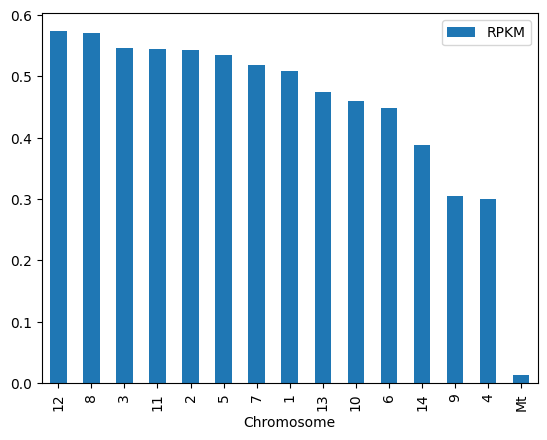

In [21]:
data.plot.bar(y='RPKM',x='Chromosome');

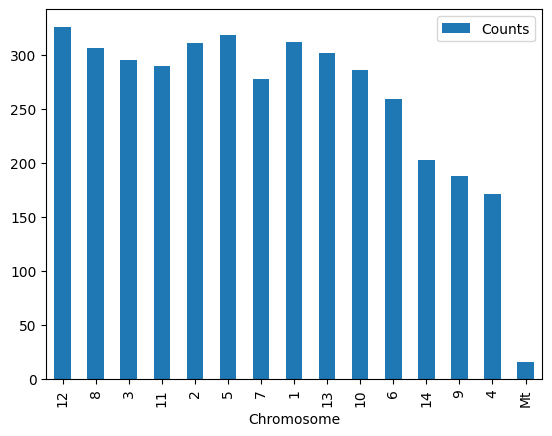

In [22]:
data.plot.bar(y='Counts',x='Chromosome');

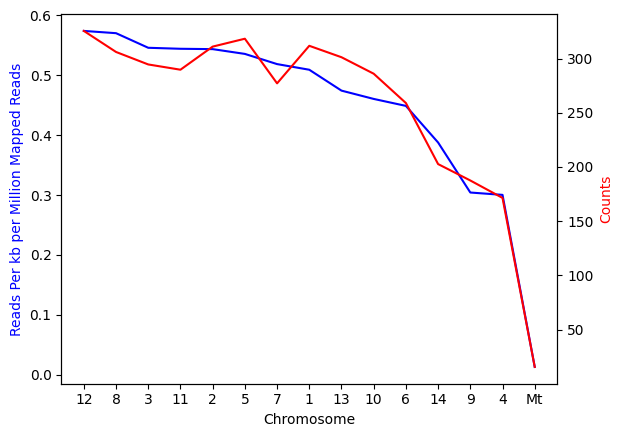

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data['Chromosome'], data['RPKM'], 'b-')
ax2.plot(data['Chromosome'], data['Counts'], 'r-')
ax1.set_ylabel('Reads Per kb per Million Mapped Reads', color='blue')
ax2.set_ylabel('Counts', color='red')
ax1.set_xlabel('Chromosome')
plt.show()
